In [ ]:
#Preprocessing
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU, InputLayer
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data_tr = pd.read_csv('/content/CERES_MAM_NW.csv')
data_tst = pd.read_csv('/content/CERES_MAM_Test.csv')
data_tr.head()

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,94.873357,49.781237,0.127829,299.451836,14.712671,1009.896683,2.207795,599.418775,617.528148,260.443662,263.700257,6.507157,11.451197,0.873690,10.701545,1.828707
1,96.398597,46.956114,0.120635,299.771747,14.387443,1008.789606,2.791852,719.429886,741.922313,274.265577,277.364824,4.146295,3.914469,0.856882,17.470791,5.774566
2,95.945079,45.261787,0.115490,299.551743,15.237293,1007.900401,4.200254,763.009374,782.301668,280.404268,282.916313,3.260472,NaN,0.785838,10.940818,6.795088
3,95.740890,49.759549,0.126483,299.821938,15.325014,1008.606716,3.503459,835.442384,850.275911,286.542979,288.388192,2.328910,6.680552,1.147441,13.457621,3.087393
4,95.432273,47.205277,0.119480,299.493551,15.157244,1009.851118,2.940792,793.285946,816.249953,281.956588,284.047654,2.822377,NaN,1.374806,10.481799,2.477497


In [ ]:
data_tst.head()

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,96.800462,47.526034,0.122425,300.127064,16.050162,1015.089918,3.350552,844.142263,885.515615,290.732529,294.285767,1.724640,1.824758,1.420339,16.155627,15.512170
1,96.663635,43.267672,0.110775,299.730459,15.691827,1014.993946,3.202219,874.369881,898.217840,290.808798,293.140731,1.498528,NaN,1.423208,12.165604,6.684609
2,96.357177,47.425556,0.120894,299.887881,16.407203,1015.275562,3.185016,859.563581,881.401688,288.059908,290.211928,1.995463,3.197356,1.535457,12.653546,1.245084
3,96.849071,48.181180,0.122179,299.651948,16.083325,1014.819929,3.204726,647.735788,668.259062,265.340896,268.690714,5.550654,NaN,0.711170,11.515582,NaN
4,97.005548,43.339338,0.109633,300.180850,15.524166,1013.965236,2.498703,700.731010,729.791456,273.298736,278.368028,4.378528,NaN,0.926069,9.582576,4.425600


In [ ]:
data_tr

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,94.873357,49.781237,0.127829,299.451836,14.712671,1009.896683,2.207795,599.418775,617.528148,260.443662,263.700257,6.507157,11.451197,0.873690,10.701545,1.828707
1,96.398597,46.956114,0.120635,299.771747,14.387443,1008.789606,2.791852,719.429886,741.922313,274.265577,277.364824,4.146295,3.914469,0.856882,17.470791,5.774566
2,95.945079,45.261787,0.115490,299.551743,15.237293,1007.900401,4.200254,763.009374,782.301668,280.404268,282.916313,3.260472,NaN,0.785838,10.940818,6.795088
3,95.740890,49.759549,0.126483,299.821938,15.325014,1008.606716,3.503459,835.442384,850.275911,286.542979,288.388192,2.328910,6.680552,1.147441,13.457621,3.087393
4,95.432273,47.205277,0.119480,299.493551,15.157244,1009.851118,2.940792,793.285946,816.249953,281.956588,284.047654,2.822377,NaN,1.374806,10.481799,2.477497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,89.073216,70.420637,0.156389,303.024184,16.123403,1001.717294,7.432844,737.449529,766.098598,280.487083,283.900471,3.476474,8.062803,1.431250,13.529250,7.379597
456,83.770430,78.803650,0.174629,302.680721,15.674334,1001.140610,7.721331,633.822953,669.209818,270.982953,276.176915,4.941130,13.950711,1.726224,19.268643,12.638768
457,60.978739,105.209507,0.233148,303.042332,15.735503,1001.256503,7.181227,389.326915,502.394924,241.919761,262.739261,9.340414,12.707869,3.397565,28.096500,61.725804
458,59.597465,152.253780,0.336940,303.054791,15.841449,1001.120632,6.788629,330.958889,464.482542,236.518376,259.622142,10.257981,16.748369,3.764959,25.720792,127.969062


In [ ]:
data_tr.isna().sum()

,0
WLW,0
SW,1
Albedo,1
ST,0
LST,0
SP,0
WS,0
CTP,0
CBP,0
CTT,0


In [ ]:
data_tst

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,96.800462,47.526034,0.122425,300.127064,16.050162,1015.089918,3.350552,844.142263,885.515615,290.732529,294.285767,1.724640,1.824758,1.420339,16.155627,15.512170
1,96.663635,43.267672,0.110775,299.730459,15.691827,1014.993946,3.202219,874.369881,898.217840,290.808798,293.140731,1.498528,NaN,1.423208,12.165604,6.684609
2,96.357177,47.425556,0.120894,299.887881,16.407203,1015.275562,3.185016,859.563581,881.401688,288.059908,290.211928,1.995463,3.197356,1.535457,12.653546,1.245084
3,96.849071,48.181180,0.122179,299.651948,16.083325,1014.819929,3.204726,647.735788,668.259062,265.340896,268.690714,5.550654,NaN,0.711170,11.515582,NaN
4,97.005548,43.339338,0.109633,300.180850,15.524166,1013.965236,2.498703,700.731010,729.791456,273.298736,278.368028,4.378528,NaN,0.926069,9.582576,4.425600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,89.077894,96.402788,0.213491,303.047817,15.698674,1004.961173,3.651618,584.961465,647.139808,263.580308,270.763429,6.104789,14.804804,2.572668,26.272051,112.936671
88,93.711737,55.679381,0.123641,303.441996,16.058992,1005.280016,2.336518,572.911986,592.533471,264.181258,266.640699,6.132097,6.882644,0.690578,8.458523,1.348599
89,84.065353,58.967706,0.130846,303.744983,16.197011,1006.417722,2.600783,385.366234,430.302137,239.467675,249.353864,9.835136,10.316877,0.642236,11.043367,7.991876
90,82.056896,64.391214,0.143051,303.577518,15.898865,1005.940919,3.192903,411.344335,455.435311,245.157043,254.174087,8.993915,8.972293,0.862394,14.281398,8.339894


In [ ]:
data_tst.isna().sum()

,0
WLW,0
SW,0
Albedo,0
ST,0
LST,0
SP,0
WS,0
CTP,0
CBP,0
CTT,0


<Axes: title={'center': 'Plot 8'}>

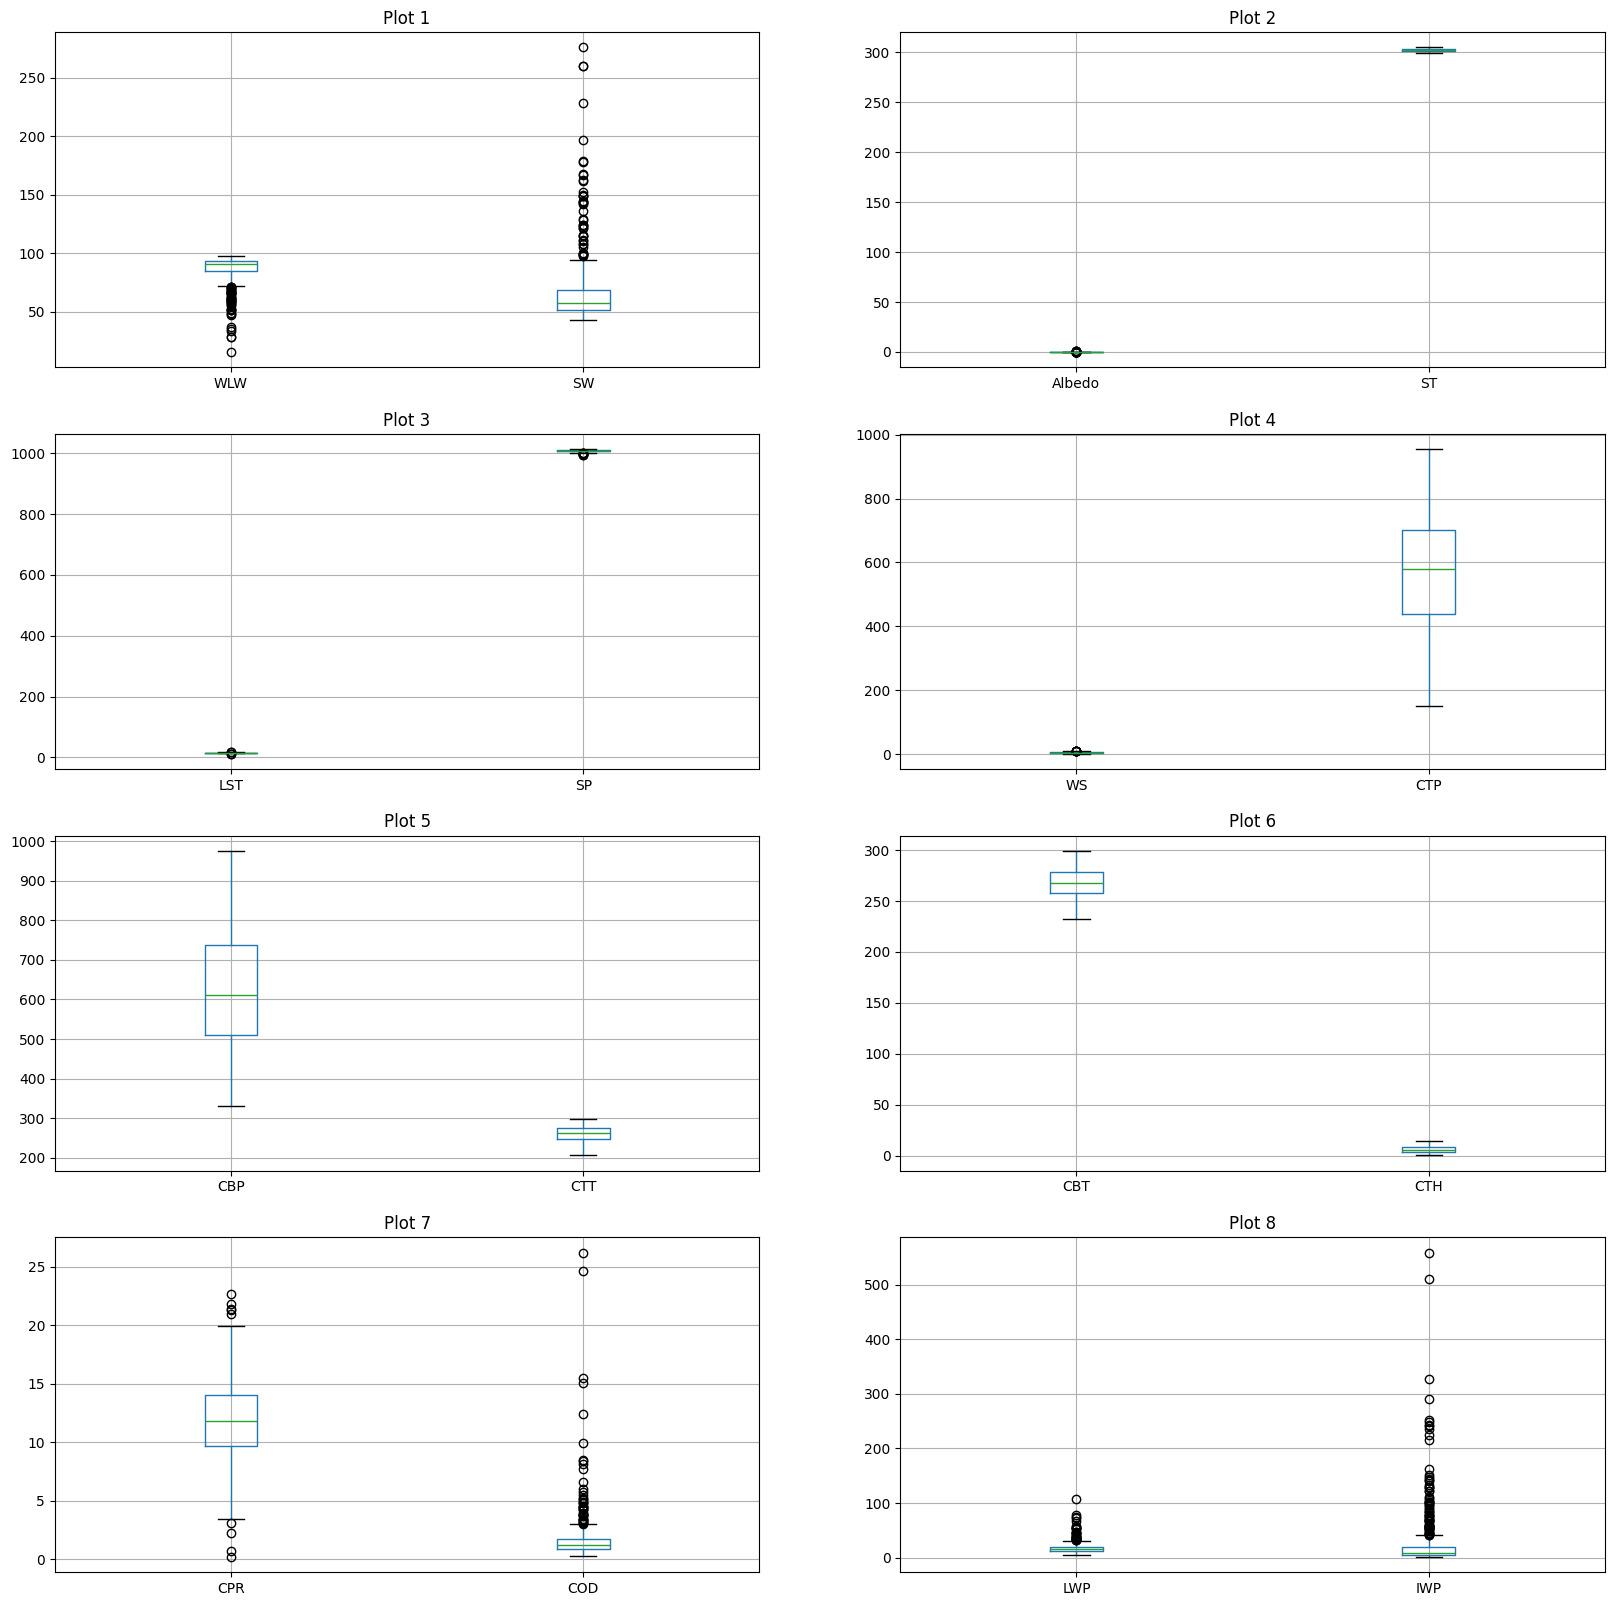

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20))
z=pd.DataFrame(data_tr,columns =["WLW", "SW"])
plt.subplot(4,2,1),plt.title("Plot 1")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["Albedo", "ST"])
plt.subplot(4,2,2),plt.title("Plot 2")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["LST", "SP"])
plt.subplot(4,2,3),plt.title("Plot 3")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["WS","CTP"])
plt.subplot(4,2,4),plt.title("Plot 4")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["CBP","CTT"])
plt.subplot(4,2,5),plt.title("Plot 5")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["CBT","CTH"])
plt.subplot(4,2,6),plt.title("Plot 6")
z.boxplot()



z=pd.DataFrame(data_tr,columns =["CPR","COD"])
plt.subplot(4,2,7),plt.title("Plot 7")
z.boxplot()

z=pd.DataFrame(data_tr,columns =["LWP","IWP"])
plt.subplot(4,2,8),plt.title("Plot 8")
z.boxplot()

In [ ]:
!pip install fancyimpute

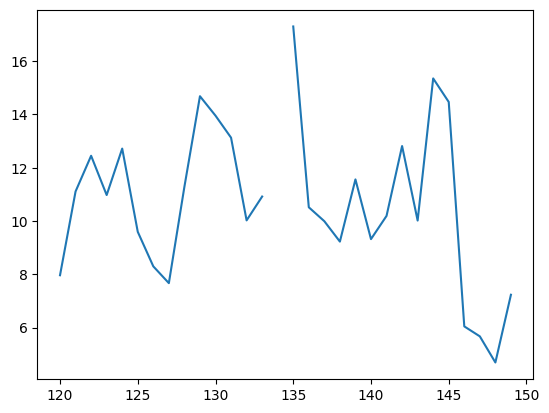

In [ ]:
plt.plot(data_tr["CPR"][120:150])

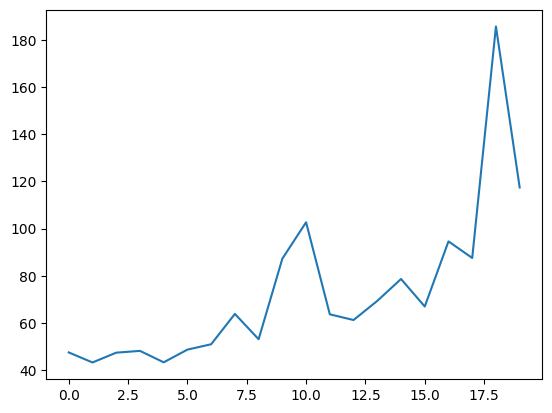

In [ ]:
plt.plot(data_tst["SW"][0:20])

In [ ]:
features=["WLW",	"SW",	"Albedo",	"ST",	"LST",	"SP",	"WS",	"CTP",	"CBP",	"CTT",	"CBT",	"CTH",	"CPR",	"COD",	"LWP",	"IWP"]

In [ ]:
d=data_tr[features]
data_features=d.apply(lambda x : pd.to_numeric(x, errors='coerce'))# Converts non numeric values to Nan , apply()- does column wise operation by default.

np.shape(data_features)

(460, 16)

In [ ]:
#imputation
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer




features=["WLW",	"SW",	"Albedo",	"ST",	"LST",	"SP",	"WS",	"CTP",	"CBP",	"CTT",	"CBT",	"CTH",	"CPR",	"COD",	"LWP",	"IWP"]

for feature in features:
    data_tr[feature] = pd.to_numeric(data_tr[feature], errors='coerce')
for feature in features:
    data_tst[feature] = pd.to_numeric(data_tst[feature], errors='coerce')


imputer = KNNImputer(n_neighbors=8)
data_trn_KNN_imputed = data_tr
data_tst_KNN_imputed = data_tst

data_trn_KNN_imputed[features] = imputer.fit_transform(data_tr[features])
data_tst_KNN_imputed[features] = imputer.fit_transform(data_tst[features])

In [ ]:
data_trn_KNN_imputed = data_tr
data_tst_KNN_imputed = data_tst
data_trn = pd.read_csv('/content/CERES_MAM_NW.csv')
data_tst = pd.read_csv('/content/CERES_MAM_Test.csv')

In [ ]:
data_trn_KNN_imputed

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,94.873357,49.781237,0.127829,299.451836,14.712671,1009.896683,2.207795,599.418775,617.528148,260.443662,263.700257,6.507157,11.451197,0.873690,10.701545,1.828707
1,96.398597,46.956114,0.120635,299.771747,14.387443,1008.789606,2.791852,719.429886,741.922313,274.265577,277.364824,4.146295,3.914469,0.856882,17.470791,5.774566
2,95.945079,45.261787,0.115490,299.551743,15.237293,1007.900401,4.200254,763.009374,782.301668,280.404268,282.916313,3.260472,8.180437,0.785838,10.940818,6.795088
3,95.740890,49.759549,0.126483,299.821938,15.325014,1008.606716,3.503459,835.442384,850.275911,286.542979,288.388192,2.328910,6.680552,1.147441,13.457621,3.087393
4,95.432273,47.205277,0.119480,299.493551,15.157244,1009.851118,2.940792,793.285946,816.249953,281.956588,284.047654,2.822377,11.494351,1.374806,10.481799,2.477497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,89.073216,70.420637,0.156389,303.024184,16.123403,1001.717294,7.432844,737.449529,766.098598,280.487083,283.900471,3.476474,8.062803,1.431250,13.529250,7.379597
456,83.770430,78.803650,0.174629,302.680721,15.674334,1001.140610,7.721331,633.822953,669.209818,270.982953,276.176915,4.941130,13.950711,1.726224,19.268643,12.638768
457,60.978739,105.209507,0.233148,303.042332,15.735503,1001.256503,7.181227,389.326915,502.394924,241.919761,262.739261,9.340414,12.707869,3.397565,28.096500,61.725804
458,59.597465,152.253780,0.336940,303.054791,15.841449,1001.120632,6.788629,330.958889,464.482542,236.518376,259.622142,10.257981,16.748369,3.764959,25.720792,127.969062


In [ ]:
data_tst_KNN_imputed

,WLW,SW,Albedo,ST,LST,SP,WS,CTP,CBP,CTT,CBT,CTH,CPR,COD,LWP,IWP
0,96.800462,47.526034,0.122425,300.127064,16.050162,1015.089918,3.350552,844.142263,885.515615,290.732529,294.285767,1.724640,1.824758,1.420339,16.155627,15.512170
1,96.663635,43.267672,0.110775,299.730459,15.691827,1014.993946,3.202219,874.369881,898.217840,290.808798,293.140731,1.498528,NaN,1.423208,12.165604,6.684609
2,96.357177,47.425556,0.120894,299.887881,16.407203,1015.275562,3.185016,859.563581,881.401688,288.059908,290.211928,1.995463,3.197356,1.535457,12.653546,1.245084
3,96.849071,48.181180,0.122179,299.651948,16.083325,1014.819929,3.204726,647.735788,668.259062,265.340896,268.690714,5.550654,NaN,0.711170,11.515582,NaN
4,97.005548,43.339338,0.109633,300.180850,15.524166,1013.965236,2.498703,700.731010,729.791456,273.298736,278.368028,4.378528,NaN,0.926069,9.582576,4.425600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,89.077894,96.402788,0.213491,303.047817,15.698674,1004.961173,3.651618,584.961465,647.139808,263.580308,270.763429,6.104789,14.804804,2.572668,26.272051,112.936671
88,93.711737,55.679381,0.123641,303.441996,16.058992,1005.280016,2.336518,572.911986,592.533471,264.181258,266.640699,6.132097,6.882644,0.690578,8.458523,1.348599
89,84.065353,58.967706,0.130846,303.744983,16.197011,1006.417722,2.600783,385.366234,430.302137,239.467675,249.353864,9.835136,10.316877,0.642236,11.043367,7.991876
90,82.056896,64.391214,0.143051,303.577518,15.898865,1005.940919,3.192903,411.344335,455.435311,245.157043,254.174087,8.993915,8.972293,0.862394,14.281398,8.339894


(120.0, 150.0)

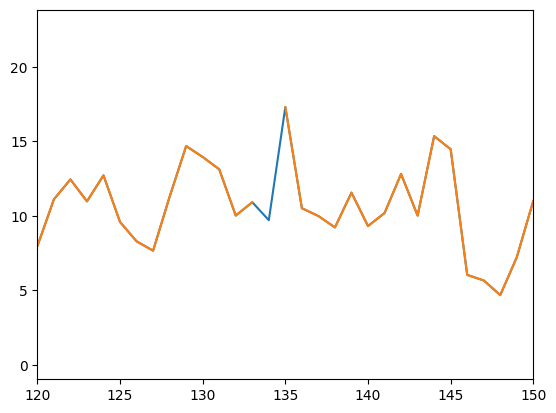

In [ ]:
plt.plot(data_trn_KNN_imputed['CPR'])
plt.xlim(120,150)
plt.plot(data_trn['CPR'])
plt.xlim(120,150)

(0.0, 20.0)

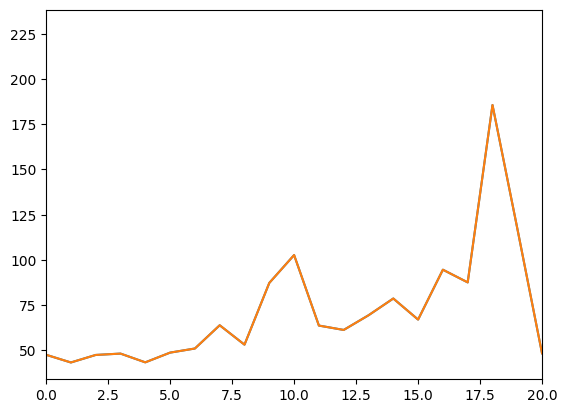

In [ ]:
plt.plot(data_tst_KNN_imputed['SW'])
plt.xlim(0,20)
plt.plot(data_tst['SW'])
plt.xlim(0,20)


In [ ]:
print("Number of missing values in data:\n{}".format(data_trn_KNN_imputed.isna().sum()))

Number of missing values in data:
WLW       0
SW        0
Albedo    0
ST        0
LST       0
SP        0
WS        0
CTP       0
CBP       0
CTT       0
CBT       0
CTH       0
CPR       0
COD       0
LWP       0
IWP       0
dtype: int64


In [ ]:
print("Number of missing values in data:\n{}".format(data_tst_KNN_imputed.isna().sum()))

Number of missing values in data:
WLW       0
SW        0
Albedo    0
ST        0
LST       0
SP        0
WS        0
CTP       0
CBP       0
CTT       0
CBT       0
CTH       0
CPR       0
COD       0
LWP       0
IWP       0
dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_trn_KNN_imputed[features] = scaler.fit_transform(data_trn_KNN_imputed[features])
data_tst_KNN_imputed[features] = scaler.fit_transform(data_tst_KNN_imputed[features])
traindata=data_trn_KNN_imputed
testdata=data_tst_KNN_imputed

<Axes: >

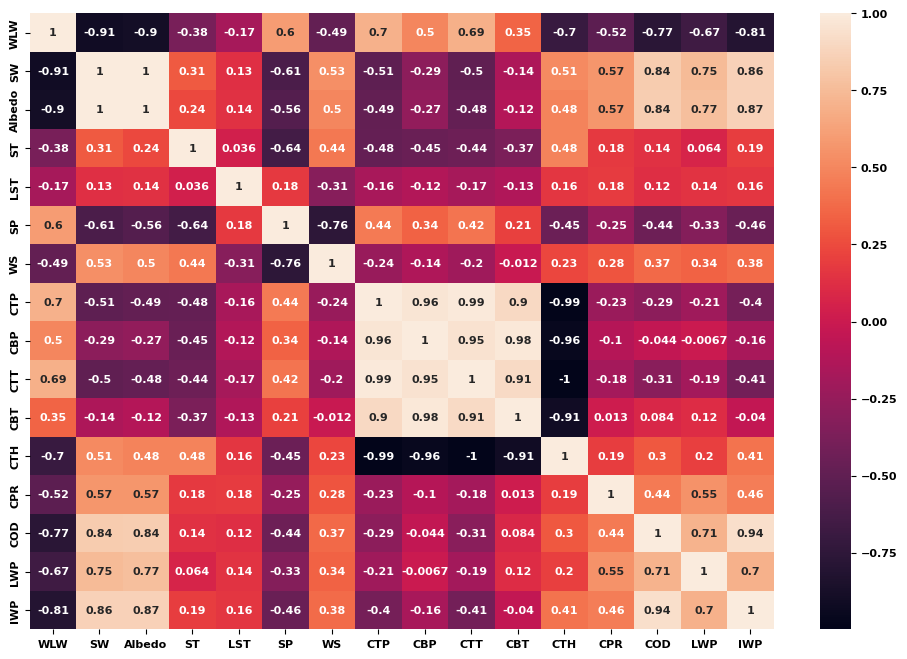

In [ ]:
plt.rc('font', size=8)
plt.rcParams["font.weight"] = "bold"

from matplotlib import rcParams

#Correlation
rcParams['figure.figsize'] = 12,8

sns.heatmap(traindata.corr(), annot=True)

<Axes: >

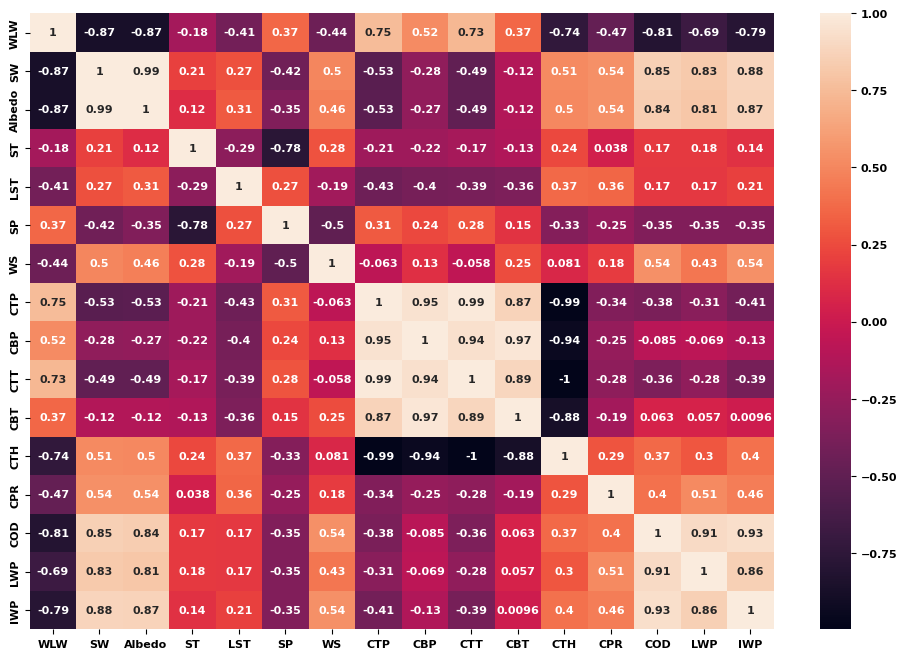

In [ ]:
plt.rc('font', size=8)
plt.rcParams["font.weight"] = "bold"

from matplotlib import rcParams

#Correlation
rcParams['figure.figsize'] = 12,8

sns.heatmap(testdata.corr(), annot=True)

In [ ]:
import pandas as pd
import heapq

def select_features(testdata):

    correlation_matrix = testdata.corr()
    features_LWP = ["WLW", "SW", "IWP", "LWP"]
    all_features = testdata.columns.tolist()
    features_to_consider = [col for col in all_features if col not in features_LWP]
    features_to_remove = set()


    priority_queue = []
    for feature in features_to_consider:
        heapq.heappush(priority_queue, (-abs(correlation_matrix.loc[feature, "LWP"]), feature))

    processed_features = set()
    while priority_queue:
        _, feature1 = heapq.heappop(priority_queue)
        if feature1 in features_to_remove:
            continue

        processed_features.add(feature1)

        for feature2 in features_to_consider:
            if feature1 != feature2 and feature2 not in features_to_remove and feature2 not in processed_features and abs(correlation_matrix.loc[feature1, feature2]) > 0.95:
                features_to_remove.add(feature2)

    selected_features = [f for f in all_features if f in features_LWP or (f in features_to_consider and f not in features_to_remove)]
    return selected_features


features_LWP = select_features(testdata)
print(features_LWP)


['WLW', 'SW', 'Albedo', 'ST', 'LST', 'SP', 'WS', 'CTP', 'CBP', 'CPR', 'COD', 'LWP', 'IWP']


In [ ]:
import pandas as pd
import heapq

def select_features(testdata):

    correlation_matrix = testdata.corr()
    features_IWP = ["WLW", "SW", "IWP", "LWP"]
    all_features = testdata.columns.tolist()
    features_to_consider = [col for col in all_features if col not in features_IWP]
    features_to_remove = set()


    priority_queue = []
    for feature in features_to_consider:
        heapq.heappush(priority_queue, (-abs(correlation_matrix.loc[feature, "IWP"]), feature))

    processed_features = set()
    while priority_queue:
        _, feature1 = heapq.heappop(priority_queue)
        if feature1 in features_to_remove:
            continue

        processed_features.add(feature1)

        for feature2 in features_to_consider:
            if feature1 != feature2 and feature2 not in features_to_remove and feature2 not in processed_features and abs(correlation_matrix.loc[feature1, feature2]) > 0.95:
                features_to_remove.add(feature2)

    selected_features = [f for f in all_features if f in features_LWP or (f in features_to_consider and f not in features_to_remove)]
    return selected_features


features_IWP = select_features(testdata)
print(features_IWP)

['WLW', 'SW', 'Albedo', 'ST', 'LST', 'SP', 'WS', 'CTP', 'CBP', 'CPR', 'COD', 'LWP', 'IWP']


In [ ]:
features_LWP=['WLW', 'SW', 'ST', 'LST', 'SP', 'WS', 'CTP', 'CBP', 'CPR', 'COD', 'IWP']

In [ ]:
features_IWP=['WLW', 'SW', 'ST', 'LST', 'SP', 'WS', 'CTP', 'CBP', 'CPR', 'COD', 'LWP']

In [ ]:

# Find keys in 'features' but not in 'features_lwp'
missing_keys = set(features) - set(features_LWP)
missing_keys2 = set(features) - set(features_IWP)
# Print the missing keys
missing_keys

{'Albedo', 'CBT', 'CTH', 'CTT', 'LWP'}

In [ ]:
missing_keys2

{'Albedo', 'CBT', 'CTH', 'CTT', 'IWP'}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:

param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.1, 0.3, 0.5],
    'eval_metric': ['rmse'] #added eval_metric
}

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # Number of cross-validation folds
    verbose=1 #added verbose
)

# Fit the GridSearchCV object to the training data
X = traindata.drop(columns=['LWP','CBT','CTH', 'CTT'])
y = traindata["LWP"]
X1 = testdata.drop(columns=['LWP','CBT','CTH', 'CTT'])
y1 = testdata["LWP"]

X_train, X_test, y_train, y_test = X, X1, y, y1

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the model


mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = root_mean_squared_error(y_test, y_pred)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared
mape = mean_absolute_percentage_error(y_test, y_pred)  # Calculate MAPE

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are pandas Series or numpy arrays
index = range(len(y_test))  # Create an index for the x-axis

plt.figure(figsize=(10, 6))
plt.plot(index, y_test, label='Actual (Test Data)', marker='o', linestyle='-')
plt.plot(index, y_pred, label='Predicted', marker='x', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Test vs. Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()

In [ ]:

param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.1, 0.3, 0.5],
    'eval_metric': ['rmse'] #added eval_metric
}

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # Number of cross-validation folds
    verbose=1 #added verbose
)

# Fit the GridSearchCV object to the training data
X = traindata.drop(columns=["IWP",'CBT',"CTH","CTT"])
y = traindata["IWP"]
X1 = testdata.drop(columns=["IWP",'CBT',"CTH","CTT"])
y1 = testdata["IWP"]

X_train, X_test, y_train, y_test = X, X1, y, y1

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = root_mean_squared_error(y_test, y_pred)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared
mape = mean_absolute_percentage_error(y_test, y_pred)  # Calculate MAPE

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are pandas Series or numpy arrays
index = range(len(y_test))  # Create an index for the x-axis

plt.figure(figsize=(10, 6))
plt.plot(index, y_test, label='Actual (Test Data)', marker='o', linestyle='-')
plt.plot(index, y_pred, label='Predicted', marker='x', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Test vs. Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
#from tensorflow.keras.models import Sequential, load_model
from keras.models import Sequential, load_model
#from tensorflow.keras.layers import Dense, LSTM, GRU, InputLayer, Dropout
from keras.layers import Dense, LSTM, GRU, InputLayer, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install optuna

import optuna
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, GRU, Dropout, Dense
from keras.optimizers import Adam


def objective(trial):
    units = trial.suggest_int("units", 32, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    # Input layers for each task (using specified features)
    input_LWP = Input(shape=(len(features_LWP), 1), name='LWP_input')
    input_IWP = Input(shape=(len(features_IWP), 1), name='IWP_input')

    # Shared GRU layers
    gru1 = GRU(units=units, return_sequences=True)(input_LWP)
    dropout1 = Dropout(dropout_rate)(gru1)
    gru2 = GRU(units=units)(dropout1)
    dropout2 = Dropout(dropout_rate)(gru2)

    # Separate output layers for IWP and LWP
    output_IWP = Dense(1, name='IWP_output')(dropout2)
    output_LWP = Dense(1, name='LWP_output')(dropout2)

    # Create the multi-output model
    model = Model(inputs=[input_LWP, input_IWP], outputs=[output_IWP, output_LWP])

    model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=[['mse'], ['mse']])  # Specifying 'mse' for both IWP and LWP outputs

    # Prepare data using specified features
    X_train_LWP = traindata[features_LWP].values.reshape(traindata.shape[0], len(features_LWP), 1)
    X_train_IWP = traindata[features_IWP].values.reshape(traindata.shape[0], len(features_IWP), 1)
    X_test_LWP = testdata[features_LWP].values.reshape(testdata.shape[0], len(features_LWP), 1)
    X_test_IWP = testdata[features_IWP].values.reshape(testdata.shape[0], len(features_IWP), 1)

    # Extract target variables
    y_train_IWP = traindata['IWP']
    y_train_LWP = traindata['LWP']
    y_test_IWP = testdata['IWP']
    y_test_LWP = testdata['LWP']

# Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    model.fit({'LWP_input': X_train_LWP, 'IWP_input': X_train_IWP},
              {'IWP_output': y_train_IWP, 'LWP_output': y_train_LWP},
              epochs=100, batch_size=32, verbose=0,
              validation_split=0.2,  # Add validation split
              callbacks=[early_stopping])  # Pass early stopping callback

    # Make predictions
    y_pred = model.predict({'LWP_input': X_test_LWP, 'IWP_input': X_test_IWP})

        # Calculate combined MSE for both outputs
    mse_IWP = mean_squared_error(y_test_IWP, y_pred[0])
    mse_LWP = mean_squared_error(y_test_LWP, y_pred[1])
    combined_mse = (mse_IWP + mse_LWP) / 2

    return combined_mse

# Create and run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # Adjust n_trials as needed

# Get the best hyperparameters
best_trial = study.best_trial
best_hyperparameters = best_trial.params

print("Best Hyperparameters:", best_hyperparameters)

[I 2024-12-19 09:28:20,520] A new study created in memory with name: no-name-6a0913c0-8f55-48e0-8120-69be0d0d5d5f


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


[I 2024-12-19 09:28:37,289] Trial 0 finished with value: 1.4890522473181476 and parameters: {'units': 93, 'dropout_rate': 0.4274389938675236, 'learning_rate': 0.003072681715888337}. Best is trial 0 with value: 1.4890522473181476.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[I 2024-12-19 09:28:49,256] Trial 1 finished with value: 1.3272748818911682 and parameters: {'units': 95, 'dropout_rate': 0.14116691974913717, 'learning_rate': 0.000392535933736374}. Best is trial 1 with value: 1.3272748818911682.


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-12-19 09:28:59,837] Trial 2 finished with value: 1.3141253999214695 and parameters: {'units': 58, 'dropout_rate': 0.3080270872147609, 'learning_rate': 0.0010019856606833454}. Best is trial 2 with value: 1.3141253999214695.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[I 2024-12-19 09:29:17,511] Trial 3 finished with value: 1.2253823249966591 and parameters: {'units': 123, 'dropout_rate': 0.4591864147539727, 'learning_rate': 0.0001198210321294947}. Best is trial 3 with value: 1.2253823249966591.


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


[I 2024-12-19 09:29:26,826] Trial 4 finished with value: 1.3053260006386338 and parameters: {'units': 117, 'dropout_rate': 0.2165657678325078, 'learning_rate': 0.0015181264387401814}. Best is trial 3 with value: 1.2253823249966591.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2024-12-19 09:29:40,599] Trial 5 finished with value: 1.1130093289976786 and parameters: {'units': 119, 'dropout_rate': 0.207563696626926, 'learning_rate': 0.00018227768462118353}. Best is trial 5 with value: 1.1130093289976786.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-12-19 09:29:48,153] Trial 6 finished with value: 2.1102908766202146 and parameters: {'units': 70, 'dropout_rate': 0.33132784916620295, 'learning_rate': 0.009404412793395014}. Best is trial 5 with value: 1.1130093289976786.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2024-12-19 09:30:05,165] Trial 7 finished with value: 1.1802181657446948 and parameters: {'units': 101, 'dropout_rate': 0.26800647249642173, 'learning_rate': 0.00014174344837631096}. Best is trial 5 with value: 1.1130093289976786.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-12-19 09:30:13,659] Trial 8 finished with value: 1.5901291284533143 and parameters: {'units': 68, 'dropout_rate': 0.11908007092452944, 'learning_rate': 0.001994179538285758}. Best is trial 5 with value: 1.1130093289976786.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-12-19 09:30:24,194] Trial 9 finished with value: 1.2892807979778773 and parameters: {'units': 119, 'dropout_rate': 0.22839091200017692, 'learning_rate': 0.00037234038439305214}. Best is trial 5 with value: 1.1130093289976786.


Best Hyperparameters: {'units': 119, 'dropout_rate': 0.207563696626926, 'learning_rate': 0.00018227768462118353}


In [ ]:
from keras.models import Model
from keras.layers import Input, GRU, Dropout, Dense
from keras.optimizers import Adam

# Assuming traindata, testdata, features_LWP, features_IWP, and best_hyperparameters are available

# Create the final model with the best hyperparameters
input_LWP = Input(shape=(len(features_LWP), 1), name='LWP_input')
input_IWP = Input(shape=(len(features_IWP), 1), name='IWP_input')

gru1 = GRU(units=best_hyperparameters['units'], return_sequences=True)(input_LWP)
dropout1 = Dropout(best_hyperparameters['dropout_rate'])(gru1)
gru2 = GRU(units=best_hyperparameters['units'])(dropout1)
dropout2 = Dropout(best_hyperparameters['dropout_rate'])(gru2)

output_IWP = Dense(1, name='IWP_output')(dropout2)
output_LWP = Dense(1, name='LWP_output')(dropout2)

final_model = Model(inputs=[input_LWP, input_IWP], outputs=[output_IWP, output_LWP])

# Compile the final model
final_model.compile(loss='mean_squared_error',
                    optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
                    metrics=[['mse'], ['mse']])  # Specifying 'mse' for both IWP and LWP outputs

# Prepare data for the final model
X_train_LWP = traindata[features_LWP].values.reshape(traindata.shape[0], len(features_LWP), 1)
X_train_IWP = traindata[features_IWP].values.reshape(traindata.shape[0], len(features_IWP), 1)
X_test_LWP = testdata[features_LWP].values.reshape(testdata.shape[0], len(features_LWP), 1)
X_test_IWP = testdata[features_IWP].values.reshape(testdata.shape[0], len(features_IWP), 1)

y_train_IWP = traindata['IWP']
y_train_LWP = traindata['LWP']
y_test_IWP = testdata['IWP']
y_test_LWP = testdata['LWP']

# Train the final model
history=final_model.fit({'LWP_input': X_train_LWP, 'IWP_input': X_train_IWP},
                {'IWP_output': y_train_IWP, 'LWP_output': y_train_LWP},
                epochs=100, batch_size=32, verbose=0,
                validation_split=0.2)

# Make predictions using the final model
final_predictions = final_model.predict({'LWP_input': X_test_LWP, 'IWP_input': X_test_IWP})
# Extract IWP and LWP predictions
IWP_predictions = final_predictions[0]
LWP_predictions = final_predictions[1]

# Calculate evaluation metrics for IWP
IWP_mape = mean_absolute_percentage_error(y_test_IWP, IWP_predictions)
IWP_mse = mean_squared_error(y_test_IWP, IWP_predictions)
IWP_rmse = np.sqrt(IWP_mse)  # RMSE is the square root of MSE
IWP_r2 = r2_score(y_test_IWP, IWP_predictions)

# Calculate evaluation metrics for LWP
LWP_mape = mean_absolute_percentage_error(y_test_LWP, LWP_predictions)
LWP_mse = mean_squared_error(y_test_LWP, LWP_predictions)
LWP_rmse = np.sqrt(LWP_mse)
LWP_r2 = r2_score(y_test_LWP, LWP_predictions)

# Print the evaluation metrics
print("\nEvaluation Metrics for LWP:")
print(f"MSE: {LWP_mse}")
print(f"RMSE: {LWP_rmse}")
print(f"R2: {LWP_r2}")
print(f"MAPE: {LWP_mape}")

print("\nEvaluation Metrics for IWP:")
print(f"MSE: {IWP_mse}")
print(f"RMSE: {IWP_rmse}")
print(f"R2: {IWP_r2}")
print(f"MAPE: {IWP_mape}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Evaluation Metrics for LWP:
MSE: 0.5007352675139776
RMSE: 0.7076265028346364
R2: 0.8712197121351277
MAPE: 0.7988633412653003

Evaluation Metrics for IWP:
MSE: 1.8075830396091854
RMSE: 1.3444638483831335
R2: 0.656479917535262
MAPE: 15.912543445061337


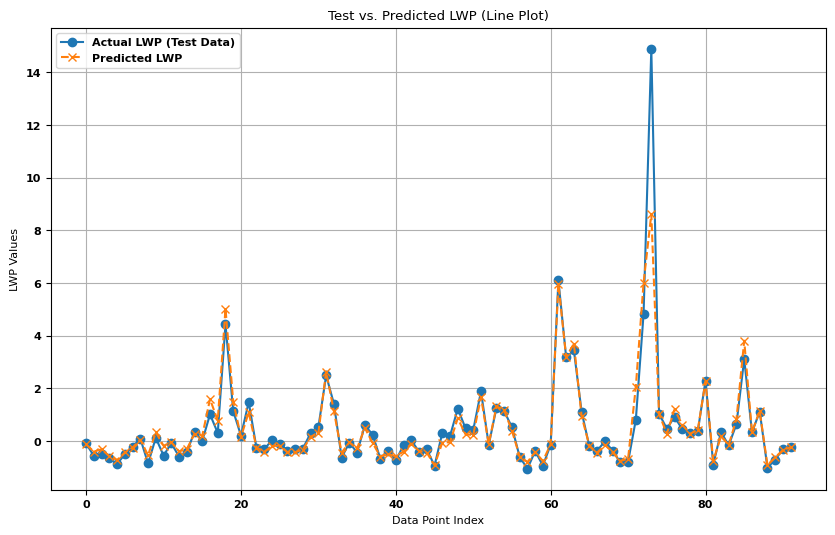

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_LWP and LWP_predictions are available from your previous code
index = range(len(y_test_LWP))  # Create an index for the x-axis

plt.figure(figsize=(10, 6))
plt.plot(index, y_test_LWP, label='Actual LWP (Test Data)', marker='o', linestyle='-')
plt.plot(index, LWP_predictions, label='Predicted LWP', marker='x', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('LWP Values')
plt.title('Test vs. Predicted LWP (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

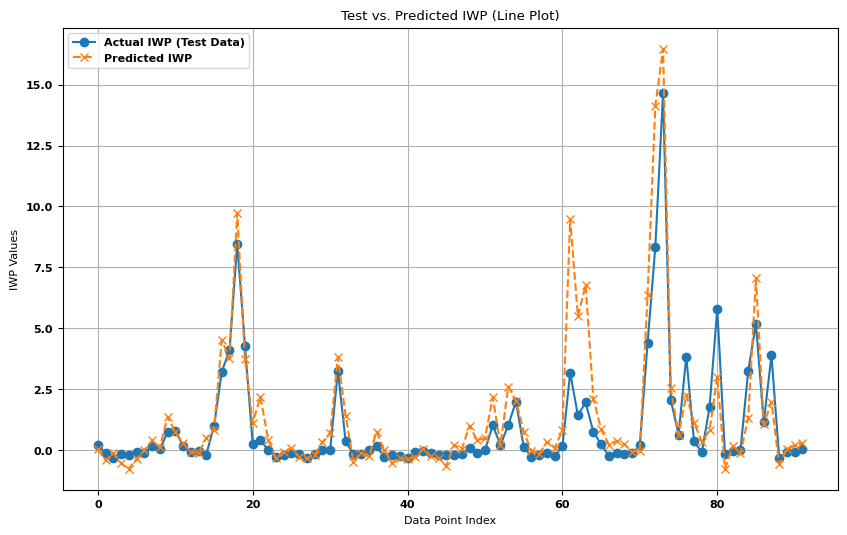

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_IWP and IWP_predictions are available from your GRU calculation
index = range(len(y_test_IWP))  # Create an index for the x-axis

plt.figure(figsize=(10, 6))
plt.plot(index, y_test_IWP, label='Actual IWP (Test Data)', marker='o', linestyle='-')
plt.plot(index, IWP_predictions, label='Predicted IWP', marker='x', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('IWP Values')
plt.title('Test vs. Predicted IWP (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

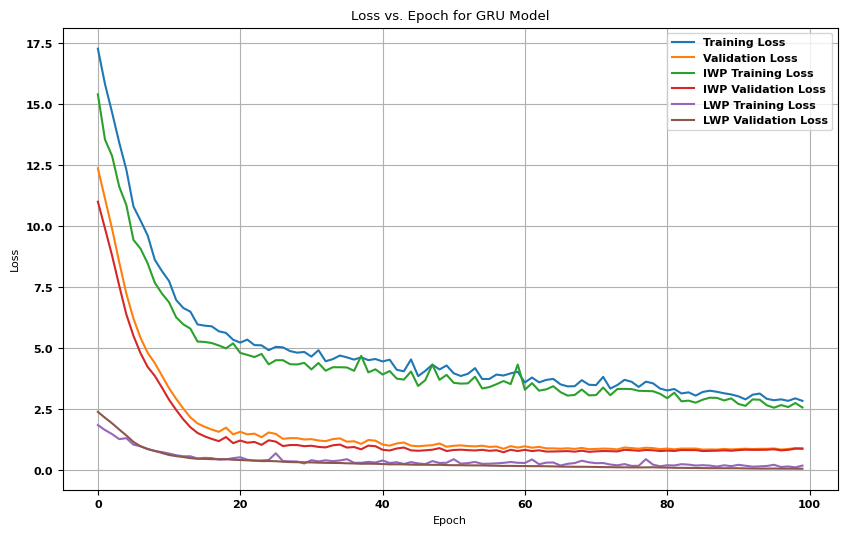

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') # Include Validation Loss
plt.plot(history.history['IWP_output_loss'], label='IWP Training Loss')
plt.plot(history.history['val_IWP_output_loss'], label='IWP Validation Loss') # Include IWP Validation Loss
plt.plot(history.history['LWP_output_loss'], label='LWP Training Loss')
plt.plot(history.history['val_LWP_output_loss'], label='LWP Validation Loss') # Include LWP Validation Loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch for GRU Model')
plt.legend()
plt.grid(True)